<div style="background-color:orange; color:white; text-align:center; padding:10px; border-radius:5px;">
    <h1>Détectez des faux billets avec R ou Python</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons :
- Il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'une instruction, de la corriger si nécessaire.
- De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**.
- D'agrémenter de graphiques.

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...

Mission : Nous sommes consultant *Data Analyst*, Votre entreprise vient de décrocher un contrat avec l’Organisation nationale de lutte contre le faux-monnayage (ONCFM) et elle souhaite vous y envoyer en tant que senior data analyst pour cette mission.Pour aller plus vite dans cette lutte, nous souhaitons mettre à disposition des équipes une application de machine learning. Celle-ci leur permettra, après avoir scanné des billets (longueur, hauteur, largeur, etc.), de faire une prédiction sur la nature des billets (vrai billet ou faux billet).

<div style="background-color:orange; color:white; text-align:center; padding:10px; border-radius:5px;">
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies, chargements et Réorganisation des données</h2>
</div>

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Importation des librairies</h3>
</div>

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "6"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings

# ACP
from sklearn.decomposition import PCA
from sklearn import preprocessing

# K-means
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import RFECV

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad, het_white, acorr_breusch_godfrey
# Sauvegarde du modèle
import joblib
from pathlib import Path

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Chargements des données</h3>
</div>

In [6]:
df = pd.read_csv("billets.csv", sep=",", header=None)
df

,0
0,is_genuine;diagonal;height_left;height_right;m...
1,True;171.81;104.86;104.95;4.52;2.89;112.83
2,True;171.46;103.36;103.66;3.77;2.99;113.09
3,True;172.69;104.48;103.5;4.4;2.94;113.16
4,True;171.36;103.91;103.94;3.62;3.01;113.51
...,...
1496,False;171.75;104.38;104.17;4.42;3.09;111.28
1497,False;172.19;104.63;104.44;5.27;3.37;110.97
1498,False;171.8;104.01;104.12;5.51;3.36;111.95
1499,False;172.06;104.28;104.06;5.17;3.46;112.25


<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Réorganisation des données</h3>
</div>

In [8]:
df = df[0].str.split(";", expand=True)

In [9]:
df

,0,1,2,3,4,5,6
0,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1,True,171.81,104.86,104.95,4.52,2.89,112.83
2,True,171.46,103.36,103.66,3.77,2.99,113.09
3,True,172.69,104.48,103.5,4.4,2.94,113.16
4,True,171.36,103.91,103.94,3.62,3.01,113.51
...,...,...,...,...,...,...,...
1496,False,171.75,104.38,104.17,4.42,3.09,111.28
1497,False,172.19,104.63,104.44,5.27,3.37,110.97
1498,False,171.8,104.01,104.12,5.51,3.36,111.95
1499,False,172.06,104.28,104.06,5.17,3.46,112.25


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Renommer noms de colonnes</h3>
</div>

In [11]:
# Renommer les colonnes avec les noms souhaités
df.columns = ['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# Supprimer la première ligne (qui contient les anciennes données)
df = df.drop(0).reset_index(drop=True)

# Afficher le dataframe final pour vérifier le résultat
print(df)

     is_genuine diagonal height_left height_right margin_low margin_up  length
0          True   171.81      104.86       104.95       4.52      2.89  112.83
1          True   171.46      103.36       103.66       3.77      2.99  113.09
2          True   172.69      104.48        103.5        4.4      2.94  113.16
3          True   171.36      103.91       103.94       3.62      3.01  113.51
4          True   171.73      104.28       103.46       4.04      3.48  112.54
...         ...      ...         ...          ...        ...       ...     ...
1495      False   171.75      104.38       104.17       4.42      3.09  111.28
1496      False   172.19      104.63       104.44       5.27      3.37  110.97
1497      False    171.8      104.01       104.12       5.51      3.36  111.95
1498      False   172.06      104.28       104.06       5.17      3.46  112.25
1499      False   171.47      104.15       103.82       4.63      3.37  112.07

[1500 rows x 7 columns]


In [12]:
df.info

<bound method DataFrame.info of      is_genuine diagonal height_left height_right margin_low margin_up  length
0          True   171.81      104.86       104.95       4.52      2.89  112.83
1          True   171.46      103.36       103.66       3.77      2.99  113.09
2          True   172.69      104.48        103.5        4.4      2.94  113.16
3          True   171.36      103.91       103.94       3.62      3.01  113.51
4          True   171.73      104.28       103.46       4.04      3.48  112.54
...         ...      ...         ...          ...        ...       ...     ...
1495      False   171.75      104.38       104.17       4.42      3.09  111.28
1496      False   172.19      104.63       104.44       5.27      3.37  110.97
1497      False    171.8      104.01       104.12       5.51      3.36  111.95
1498      False   172.06      104.28       104.06       5.17      3.46  112.25
1499      False   171.47      104.15       103.82       4.63      3.37  112.07

[1500 rows x 7 colu

- 1500 lignes de données
- 1 variable qualitative
- 6 variables quantitative

In [14]:
print("La variable margin_low compte",df.margin_low.isnull().sum(),"lignes avec des valeurs null !")

La variable margin_low compte 0 lignes avec des valeurs null !


In [15]:
df.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500,1500,1500,1500,1500,1500,1500
unique,2,159,155,170,286,123,336
top,True,171.99,103.95,103.76,,3.08,113.38
freq,1000,28,30,28,37,35,19


**Pas de valeur abérante !**

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Nettoyage des données</h3>
</div>

In [18]:
# Suppression des doublons

print('Nombre de doublons supprimer :',len(df) - len(df.drop_duplicates()))

Nombre de doublons supprimer : 0


<div style="background-color:orange; color:white; text-align:center; padding:10px; border-radius:5px;">
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse descriptive des données</h2>
</div>

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Analyse du Nombre de billets Vrai et Faux</h3>
</div>

In [21]:
# Nombre de vrais et faux billets

df['is_genuine'].value_counts()

is_genuine
True     1000
False     500
Name: count, dtype: int64

Nous avons 1000 Vrais billets & 500 Faux billets

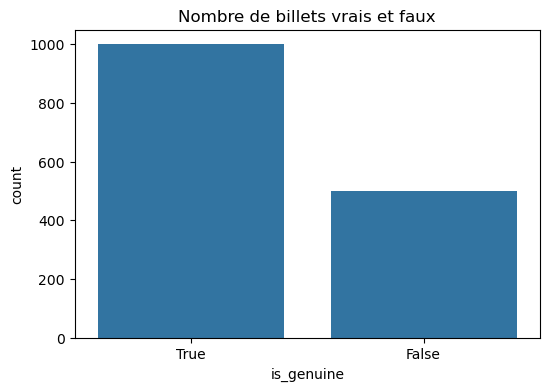

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_genuine')
plt.title('Nombre de billets vrais et faux')
plt.show()

In [24]:
# Convertir les colonnes 'True'/'False' en 1/0
for col in df.columns:
    if df[col].dtype == 'object' and set(df[col].unique()) <= {'True', 'False'}:
        df[col] = df[col].map({'True': 1, 'False': 0})

In [25]:
#Conversion en numérique
df = df.apply(pd.to_numeric, errors='coerce')

In [26]:
# Garder uniquement les colonnes numériques
df_num = df.select_dtypes(include=[np.number])

In [27]:
# Calculer la matrice de corrélation
matrix = df_num.corr()

In [28]:
# Créer un masque pour le triangle supérieur
mask = np.triu(np.ones_like(matrix, dtype=bool))

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Heatmap des corrélations</h3>
</div>

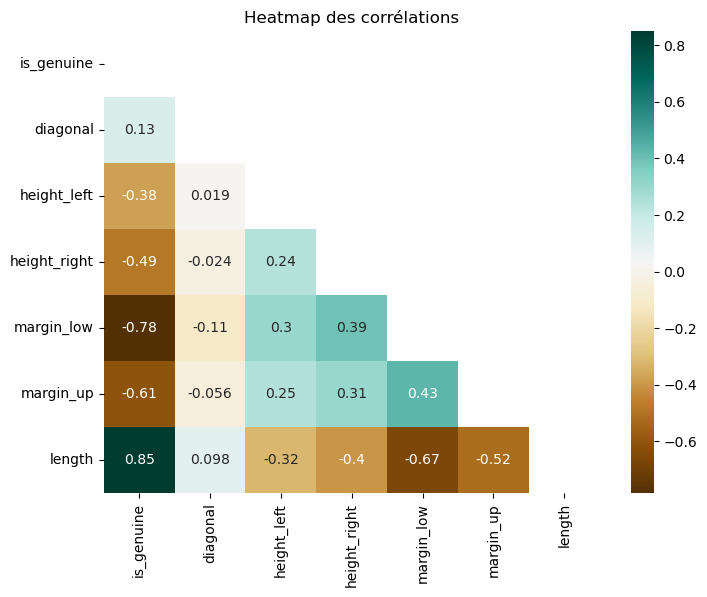

In [30]:
# Heatmap des corrélations

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')
plt.title('Heatmap des corrélations')
plt.show()

**Les 2 variables quantitative les plus corréler sont 'length' et 'is_genuine', elle sont corréler Positivement !**

- 'length' est aussi assez bien corréler négativement à 'margin_low' et 'margin_up'
- 'is_genuine' est aussi assez bien corréler à 'margin_low' et 'margin_up'
---

**Liste des variables les plus corréler à 'is_genuine' dans l'ordre décroissant :**
- length (0.85, positif)
- margin_low (-0.78, négatif)
- margin_up (-0.61, négatif)
- height_right (-0.49, négatif)
- height_left (-0.38, négatif)
- diagonal (0.13, positif)

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Relation entre les variables</h3>
</div>

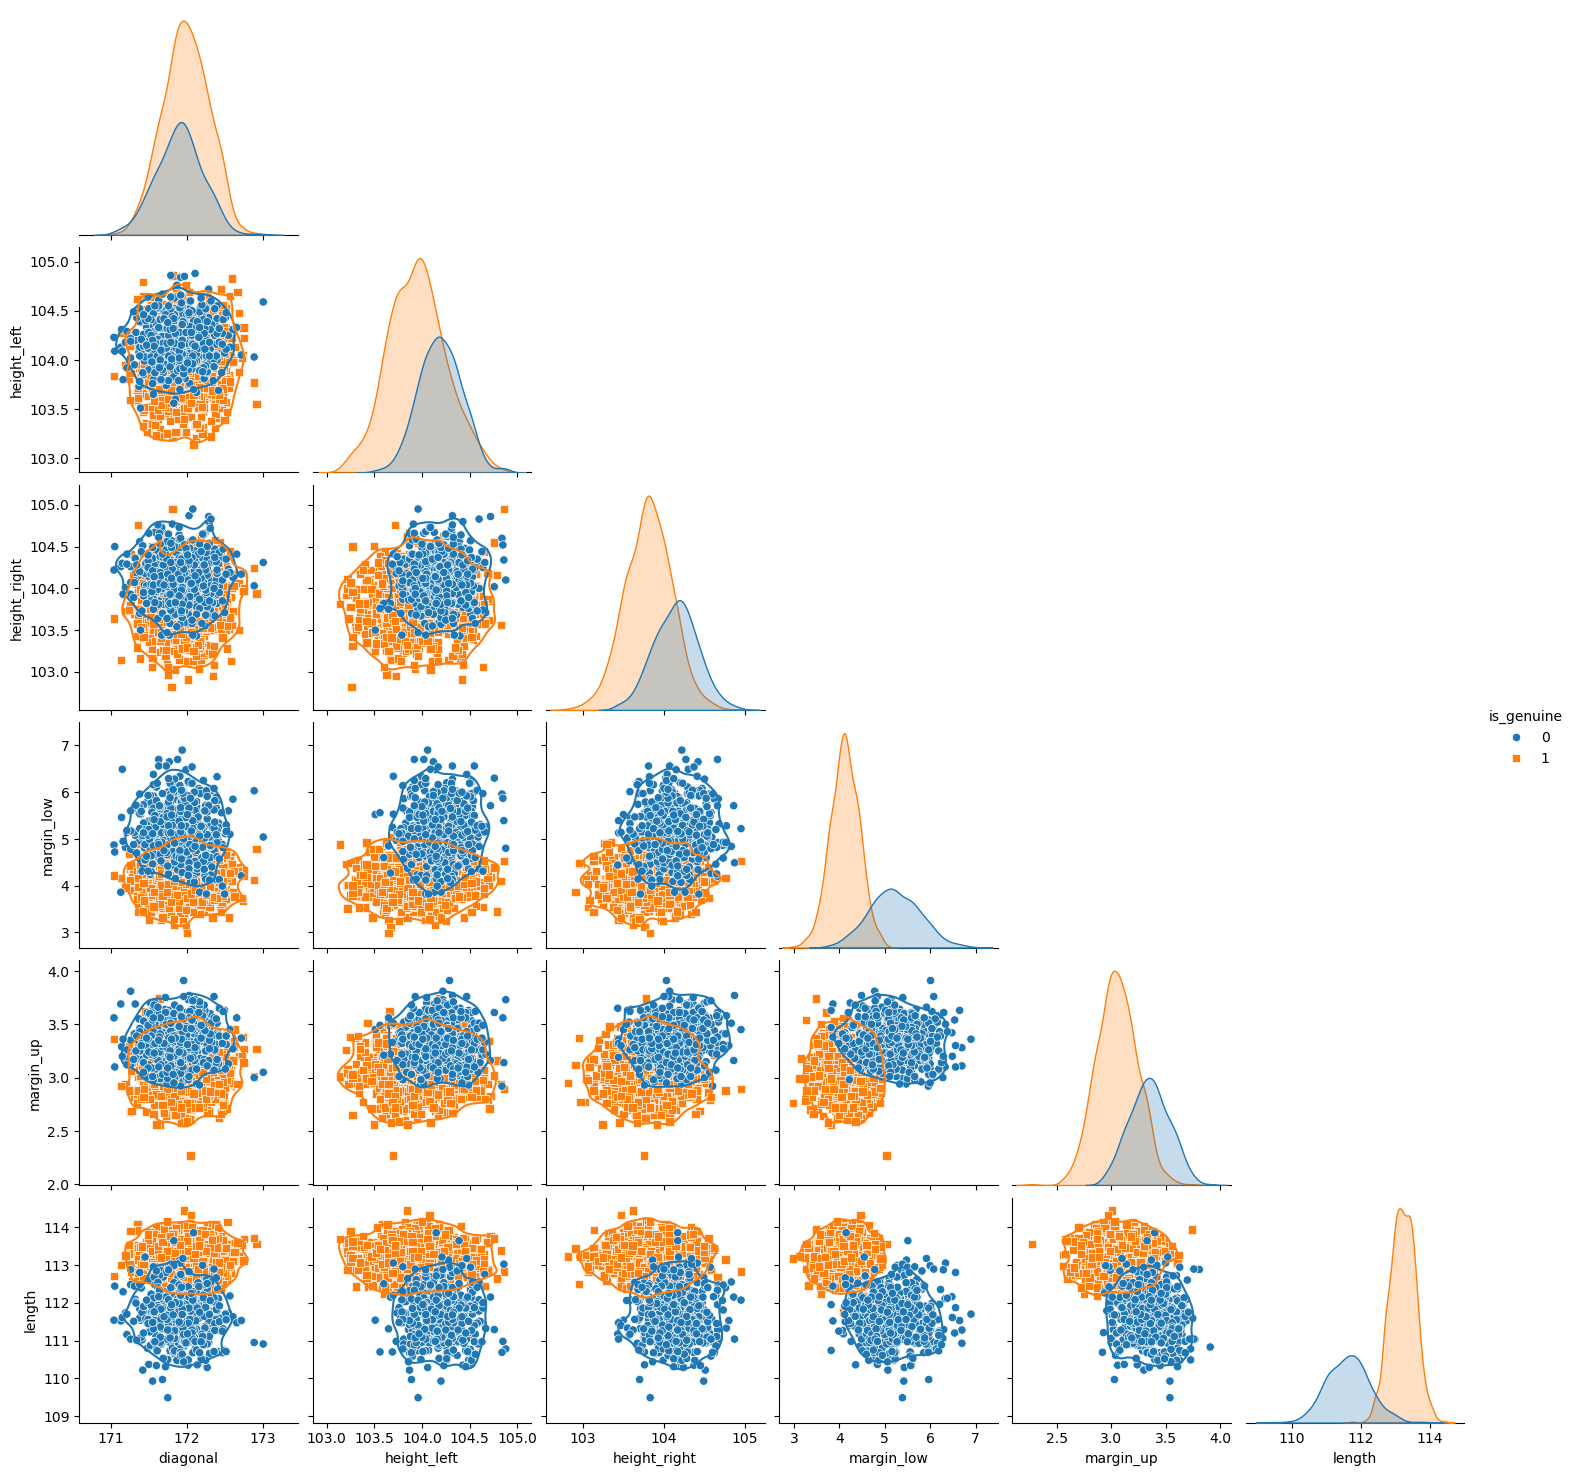

In [33]:
# Visualisation par nuage de points des différentes relations entre les variables

g = sns.pairplot(df, hue='is_genuine', markers=['o','s'], corner=True)
g.map_lower(sns.kdeplot, levels=2, color='.2')
plt.show()

**Les 2 groupes sont le plus distinct sur la ligne de la variable 'length'**

Groupe 1 :

is_genuine et length = Forte corrélation positive (0.85). Ces deux variables évoluent ensemble : quand length augmente, is_genuine tend à augmenter également.

Groupe 2 :

is_genuine et margin_low = Forte corrélation négative (-0.78) Ces variables sont opposées : quand margin_low augmente, is_genuine diminue fortement.

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Comparaison visuelle des vrai et faux billets</h3>
</div>

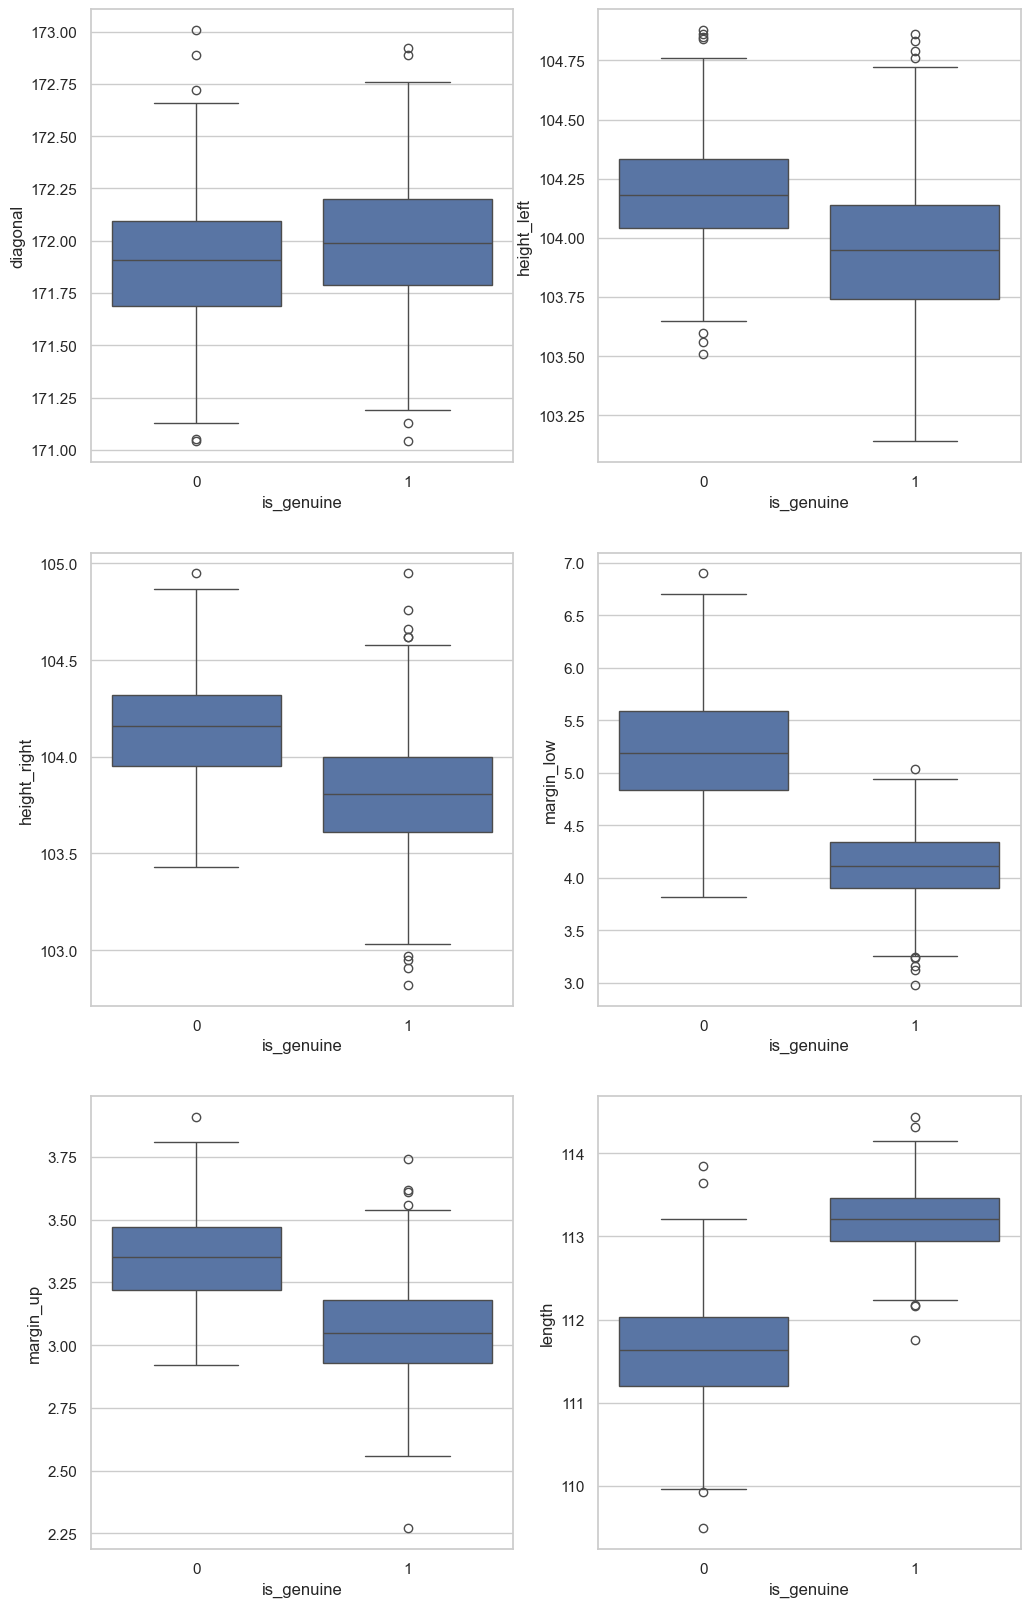

In [36]:
# Comparaison visuelle des vrai et faux billets pour chaque variables par Boxplot

plt.figure(figsize=(12, 20))
sns.set(style="whitegrid")

plt.subplot(321)
sns.boxplot(data=df, x='is_genuine', y='diagonal')

plt.subplot(322)
sns.boxplot(data=df, x='is_genuine', y='height_left')

plt.subplot(323)
sns.boxplot(data=df, x='is_genuine', y='height_right')

plt.subplot(324)
sns.boxplot(data=df, x='is_genuine', y='margin_low')

plt.subplot(325)
sns.boxplot(data=df, x='is_genuine', y='margin_up')

plt.subplot(326)
sns.boxplot(data=df, x='is_genuine', y='length')

plt.show(block=False)

**Les variables 'length' et 'margin_low' et 'margin_up' ont le plus de différence entre les vrais et les faux billets !**

Length = Corrélation positive (0.85) | Les billets authentiques ont tendance à avoir une longueur différente des faux billets.

Margin_low = Corrélation négative (-0.78) | Une faible marge basse est souvent associée aux vrais billets, alors qu’elle est plus grande sur les faux.

Margin_up = Corrélation négative (-0.61) | Une faible marge haute est plus fréquente sur les vrais billets que sur les faux.

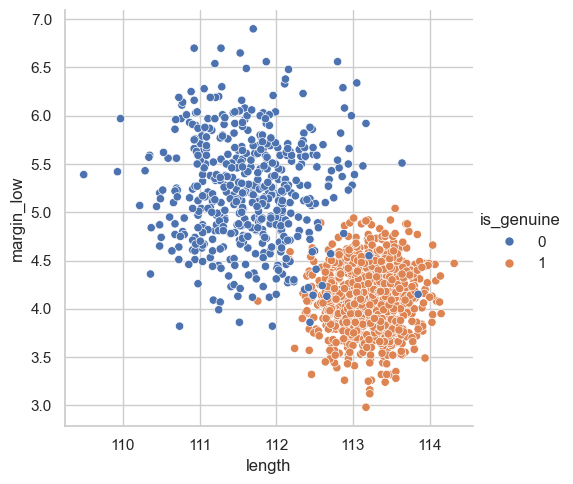

In [38]:
# Visualisation des vrais/faux billets sur 'margin_low' par rapport à 'length'

x = df['length']
y = df['margin_low']
z = df['is_genuine']

sns.relplot(x = x, y = y, hue= z)
plt.show()

Certains paramètres montrent une grande variabilité entre les groupes, ce qui pourrait indiquer des caractéristiques clés permettant de distinguer les vrais des faux billets.

On observe des différences marquées sur des variables comme la longueur et les marges, qui ont déjà été identifiées comme des facteurs importants de distinction.

<div style="background-color:orange; color:white; text-align:center; padding:10px; border-radius:5px;">
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Enrichissement des données</h2>
</div>

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Régression linéaire simple</h3>
</div>

In [42]:
#identifier les valeurs manquantes de margin_low
df_nan = df[df['margin_low'].isnull()]
print(f"Lignes avec margin_low manquant : {len(df_nan)}")

Lignes avec margin_low manquant : 37


In [43]:
# Suppression des lignes contenant 1 valeurs manquantes
df_full = df.dropna(inplace=False)

# Variable de prédiction
X = df_full[['length']]
# Variable a prédir
y = df_full[['margin_low']]

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [44]:
# Prédiction de y en fonction de X

y_pred = lr.predict(X)
y_pred

array([[4.40728129],
       [4.27549835],
       [4.24001833],
       ...,
       [4.85331586],
       [4.70125862],
       [4.79249296]])

In [45]:
# Coefficient de détermination R²
# y = (coef * X) + intercept

print('Constante :',lr.intercept_)
print('Coef :', lr.coef_)
print('R² :',lr.score(X,y))

Constante : [61.59600862]
Coef : [[-0.50685746]]
R² : 0.4445592708293491


<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Régression linéaire multiple</h3>
</div>

Utilisation de la régression linéaire multiple pour prédire les valeurs de margin_low manquantes grace aux autres variable ! (Selon une note laisser par un collègue)

In [48]:
# Suppression des lignes contenant 1 valeurs manquantes
df_full = df.dropna(inplace=False)

# Variable de prédiction
#X = df_full['length'][:, np.newaxis]
X = df_full[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
# Variable a prédir
y = df_full[['margin_low']]

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [49]:
# Prédiction de y en fonction de X

y_pred = lr.predict(X)
y_pred

array([[4.78867649],
       [4.13890773],
       [4.12593262],
       ...,
       [4.90027735],
       [4.80857449],
       [4.83903233]])

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Evaluation de la régression linéaire multiple</h3>
</div>

In [51]:
# Coefficient de détermination R²
# y = (coef * X) + intercept

print('Constante :',lr.intercept_)
print('Coef :', lr.coef_)
print('R² :',lr.score(X,y))

Constante : [22.99484271]
Coef : [[-0.11105978  0.18412242  0.25713805  0.2561879  -0.40910293]]
R² : 0.4773366973063956


Les coefficients représentent l'importance des différentes variables dans la prédiction de y. Plus le coef est grand plus la variable est significative pour prédire y !

Le R² est le coefficient de détermination, qui nous permet de savoir si notre modele est bon ou pas. Plus le coefficient de détermination est proche de 1, meilleur est notre modèle !
___

Ici notre coefficient de détermination est faible (0,47), ce qui représente un mauvais model selon cet indicateur !

In [54]:
# Erreur de la moyenne absolue
print('MAE :', metrics.mean_absolute_error(y, y_pred))
# Erreur de la moyenne absolue au carré
print('MSE :', metrics.mean_squared_error(y, y_pred))
# Erreur quadratique moyenne est la racine carrée de la moyenne de la somme des carrés des valeurs résiduelles.
print('RMSE :', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MAE : 0.3722362700627651
MSE : 0.23015269769784186
RMSE : 0.4797423242719386


Le MAE ,MSE et RMSE sont des indicateur qui nous permettent d'en savoir plus sur nos résidus. Plus l'indicateur est faible, meilleur est le modèle !
___

Ici on voit que nos indicateurs sont assez faible pour nous indiquer que notre modèle est bon !

In [56]:
# Test de significativité globale

n = X.shape[0]
p = X.shape[1]

F = (lr.score(X,y) / (p - 1)) / ((1 - lr.score(X,y)) / (n - p))
p_value = 1 - stats.f.cdf(F, p - 1, n - p)

**Utilisation de la bibliothèque 'statsmodels', pour plus de précision et d'information statistique !**

In [58]:
# Ajouter une constante à X pour l'intercept de la régression

X = sm.add_constant(X)

# Créer le modèle de régression linéaire multiple

mlr = sm.OLS(y, X).fit()
#patsy.dmatrix("B + C", data=df)

In [59]:
# Prédiction de y en fonction de X

Y_pred = mlr.predict(X)
Y_pred

0       4.788676
1       4.138908
2       4.125933
3       4.156580
4       4.577425
          ...   
1495    5.191741
1496    5.456887
1497    4.900277
1498    4.808574
1499    4.839032
Length: 1463, dtype: float64

In [60]:
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          2.60e-202
Time:                        14:56:42   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9948      9.656      2.382   

In [61]:
# Test de significativité individuelle
t_values = mlr.tvalues[1:]
p_values = mlr.pvalues[1:]

# Test de normalité des résidus (test de Jarque-Bera)
residuals = mlr.resid
jb_value, jb_pvalue = normal_ad(residuals)

# Test d'homoscédasticité (test de Breusch-Pagan)
bp_value, bp_pvalue, _, _ = het_breuschpagan(residuals, X)

print("Test de significativité globale : p_value =", p_value,"\n")
print("Test de significativité individuelle : t =", t_values, " p_value =", p_values,"\n")
print("Test de normalité des résidus : p_value =", jb_pvalue,"\n")
print("Test d'homoscédasticité : p_value =", bp_pvalue,"\n")

Test de significativité globale : p_value = 1.1102230246251565e-16 

Test de significativité individuelle : t = diagonal        -2.680060
height_left      4.112527
height_right     5.977983
margin_up        3.979907
length         -22.626708
dtype: float64  p_value = diagonal        7.443859e-03
height_left     4.132146e-05
height_right    2.836546e-09
margin_up       7.233463e-05
length          2.183858e-97
dtype: float64 

Test de normalité des résidus : p_value = 5.114137678791534e-12 

Test d'homoscédasticité : p_value = 7.759535216202217e-16 



**Test de significativité globale**  
La valeur p est inférieure à 0,05 donc la régression linéaire multiple est statistiquement significative.  
  
**Test de significativité individuelle**  
Les valeurs p de toutes les variables indépendantes sont inférieure à 0,05 donc toutes les variables contribut significativement à la régression linéaire multiple.  
  
**Test de normalité des résidus**  
La valeur p est inférieure à 0,05 donc les résidus ne suivent pas une distribution normale.  
  
**Test d'homoscédasticité**  
La valeur p est inférieure à 0,05 donc la variance des résidus n'est pas constante et la régression linéaire multiple pourrait ne pas être fiable pour prédire les valeurs de la variable dépendante.

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Visualisation de la régression linéaire multiple</h3>
</div>

In [64]:
# Prédiction des valeurs 'margin_low' manquantes grâce aux autres valeurs en utilisant la régression linéaire multiple !

df_nan = df[df['margin_low'].isnull()]
t = df_nan.loc[:,['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_nan = lr.predict(t).round(2)

In [65]:
# DataFrame des valeurs prédis en utilisant la régression linéaire multiple !

df_pred = pd.DataFrame(y_nan, columns=['margin_low'])

df_pred['is_genuine'] = df_nan['is_genuine'].values
df_pred['diagonal'] = df_nan['diagonal'].values
df_pred['height_left'] = df_nan['height_left'].values
df_pred['height_right'] = df_nan['height_right'].values
df_pred['margin_up'] = df_nan['margin_up'].values
df_pred['length'] = df_nan['length'].values

df_pred = df_pred[['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

df_pred.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.94,103.89,103.45,4.32,3.25,112.79
1,1,171.93,104.07,104.18,4.39,3.14,113.08
2,1,172.07,103.80,104.38,4.41,3.02,112.93
3,1,171.45,103.66,103.80,4.32,3.62,113.27
4,1,171.83,104.14,104.06,4.65,3.02,112.36


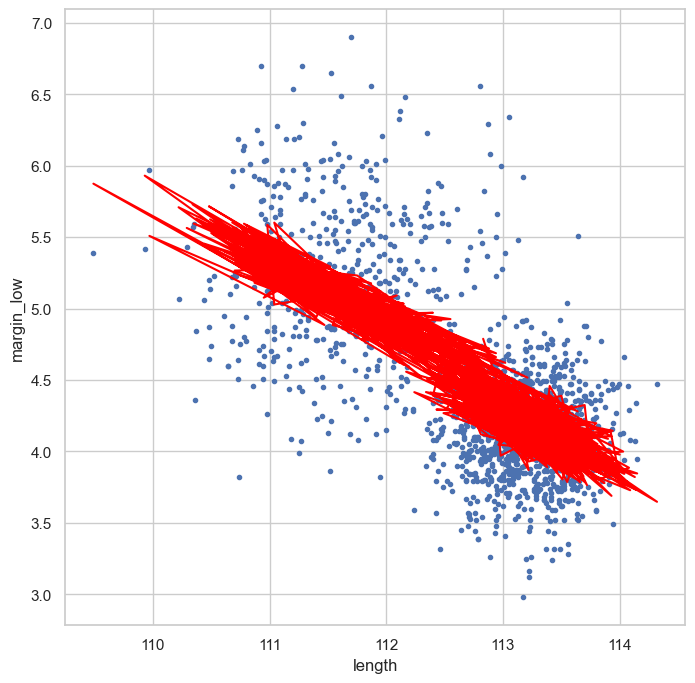

In [66]:
# Visualisation de la droite de régression linéaire

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("length")
ax.set_ylabel("margin_low")

_ = ax.scatter(df_full.length, df_full.margin_low, c="b", marker=".", alpha=1)
_ = ax.plot(df_full.length, y_pred, c="red")

**La régression linéaire multiple prend en compte plusieurs variables donc plusieurs dimensions. Ici nous avons 6 variables donc 6 dimensions ! Malheureusement on ne peut pas visualiser plus de 3 dimensions !**

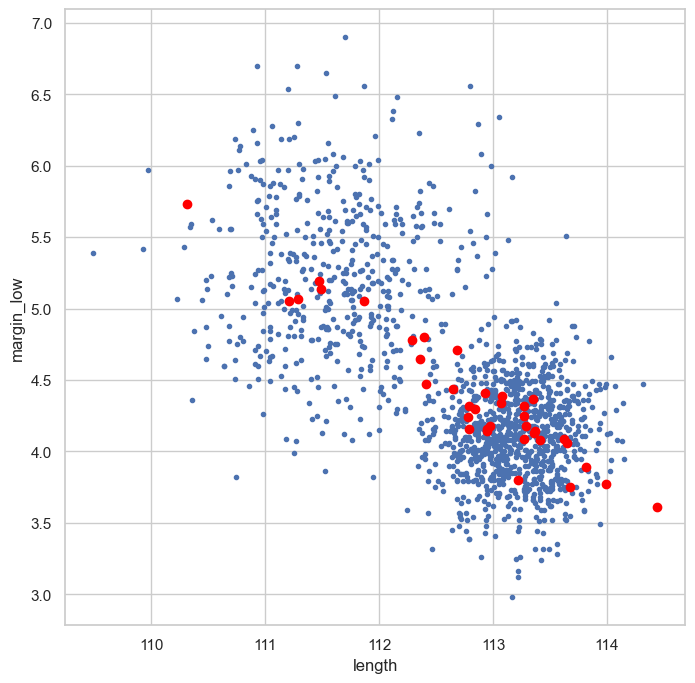

In [68]:
# Visualisation des valeurs prédis sur la droite de régression linéaire

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("length")
ax.set_ylabel("margin_low")

_ = ax.scatter(df_full.length, df_full.margin_low, c="b", marker=".", alpha=1)
#_ = ax.plot(df_full.length, y_pred, c="red")
_ = ax.scatter(df_pred.length, df_pred.margin_low, c="red")

Les valeurs de 'margin_low' prédites grace à la régression linéaire multiple avec nos données, comme on peut le voir sur cet exemple !

In [70]:
# Ajout des données manquantes crée grace à la prédiction

data = pd.concat([df_full, df_pred])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 36
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 93.8 KB


**Nous avons plus aucune valeur manquante !**

<div style="background-color:orange; color:white; text-align:center; padding:10px; border-radius:5px;">
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse en Composantes Principales (ACP)</h2>
</div>

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Normalisation des données</h3>
</div>

In [74]:
# On supprime la variable qualitative
N = data.drop(['is_genuine'], axis=1)

std_scale = sk.preprocessing.StandardScaler().fit(N) # Fit des valeurs sur le modèle
data_std = pd.DataFrame(std_scale.transform(N), columns=N.columns) # Valeurs standardisées
data_std

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.486540,2.774123,3.163240,0.055382,-1.128325,0.173651
1,-1.633729,-2.236535,-0.799668,-1.081976,-0.696799,0.471666
2,2.397823,1.504756,-1.291191,-0.126595,-0.912562,0.551901
3,-1.961498,-0.399294,0.060498,-1.309447,-0.610494,0.953075
4,-0.748754,0.836669,-1.414072,-0.672527,1.417677,-0.158750
...,...,...,...,...,...,...
1495,0.693427,1.538161,-0.492466,0.859114,-0.955715,-1.683213
1496,0.398435,0.402412,0.767063,0.449666,1.072457,-0.445303
1497,-0.781531,1.437948,0.613462,1.890319,1.978661,-2.714803
1498,2.299493,1.003691,1.504349,1.071421,1.762898,-1.385197


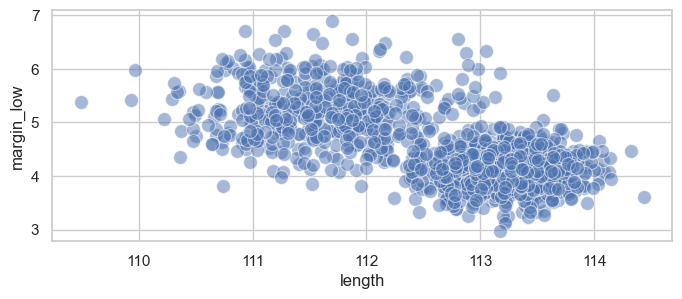

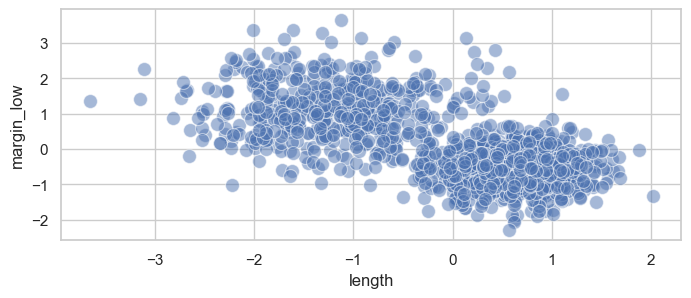

In [75]:
# Exemple avec length et de margin_low !

plt.figure(figsize=(8, 3))
sns.scatterplot(data=data, x='length', y='margin_low', s=100, alpha=.5)

plt.show()

plt.figure(figsize=(8, 3))
sns.scatterplot(data=data_std, x='length', y='margin_low', s=100, alpha=.5)

plt.show()

**Les données sont standardisée pour facilité leurs études !**

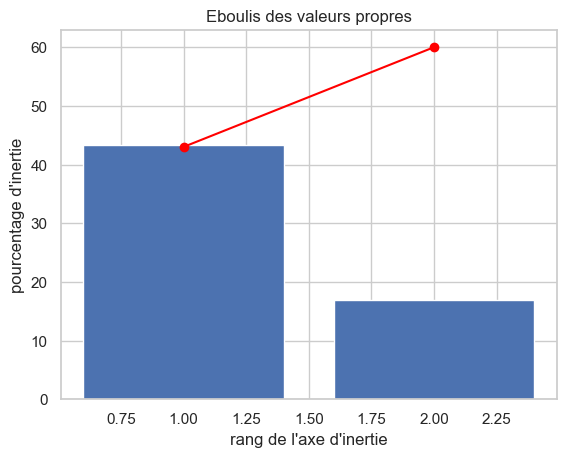

Variance expliquée : 60.2 %


In [77]:
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(data_std)

#pca.explained_variance_ratio_

scree = (pca.explained_variance_ratio_*100).round(2)

scree_cum = scree.cumsum().round()

x_list = range(1, n_components+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)
print(
    'Variance expliquée :', 
    round(sum(pca.explained_variance_ratio_) * 100, 1), '%')

In [78]:
features = data_std.columns

# Création du DataFrame des 2 premières composantes principales
pca = PCA(n_components=n_components)
data_acp = pca.fit_transform(data_std)

df_acp = pd.DataFrame(data_acp, columns=[f'PC{i+1}' for i in range(n_components)])

df_acp['is_genuine'] = data['is_genuine'].values

df_acp.head()

,PC1,PC2,is_genuine
0,-1.644104,0.747792,1
1,2.019920,-2.207480,1
2,0.969838,2.620523,1
3,1.377480,-1.818400,1
4,-0.148718,-0.566777,1


In [79]:
# Création du Dataframe des centroides

df_centroide = df_acp.groupby('is_genuine').mean()
df_centroide = df_centroide.reset_index()
df_centroide['is_genuine'] = df_centroide['is_genuine'].replace([True, False], 'centroide')
df_centroide

,is_genuine,PC1,PC2
0,0,-2.035777,-0.080150
1,1,1.017889,0.040075


In [80]:
# Concaténation des 2 DataFrame

df_acp = pd.concat([df_acp, df_centroide], ignore_index = True)
df_acp

,PC1,PC2,is_genuine
0,-1.644104,0.747792,1
1,2.019920,-2.207480,1
2,0.969838,2.620523,1
3,1.377480,-1.818400,1
4,-0.148718,-0.566777,1
...,...,...,...
1497,-4.043061,-0.505810,0
1498,-2.777827,2.482406,0
1499,-2.131126,0.059742,0
1500,-2.035777,-0.080150,0


In [81]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('PC{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('PC{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (PC{} et PC{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

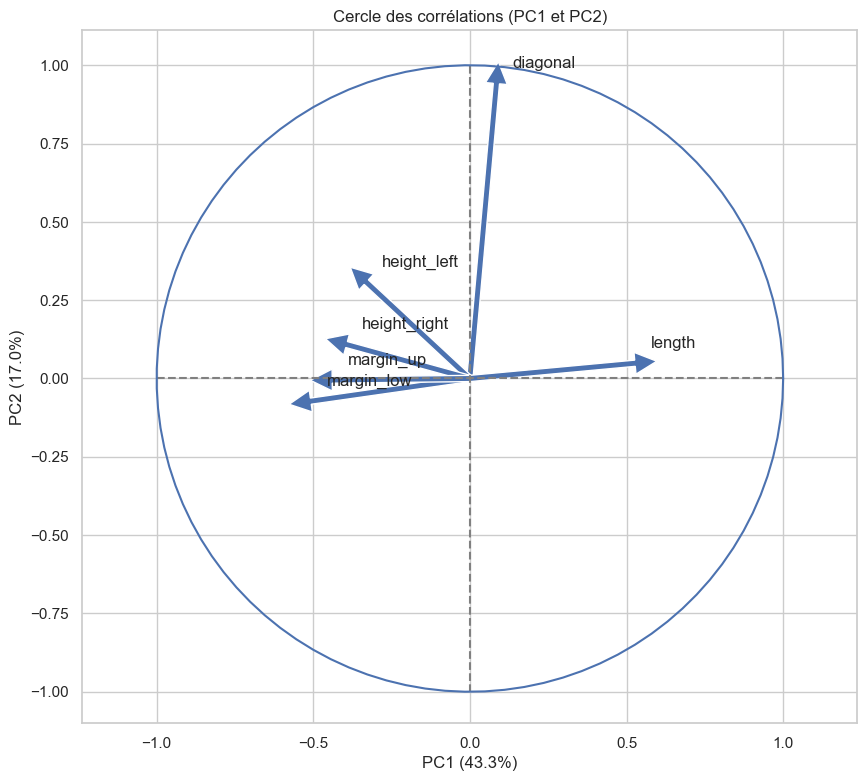

In [82]:
correlation_graph(pca, (0,1), features)

**Lecture du cercle des corrélations**

Les 2 variables les mieux représenter sont 'diagonal' et 'length', car les flèches de ces variables sont les plus grandes !
___

- L'axe des ordonnées est représenter par 'diagonal'
- L'axe des abscisses est représenter par 'length'

In [84]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette = 'bright')
    
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}')
    ax.set_ylabel(f'PC{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur PC{x+1} et PC{y+1})")
    plt.show()

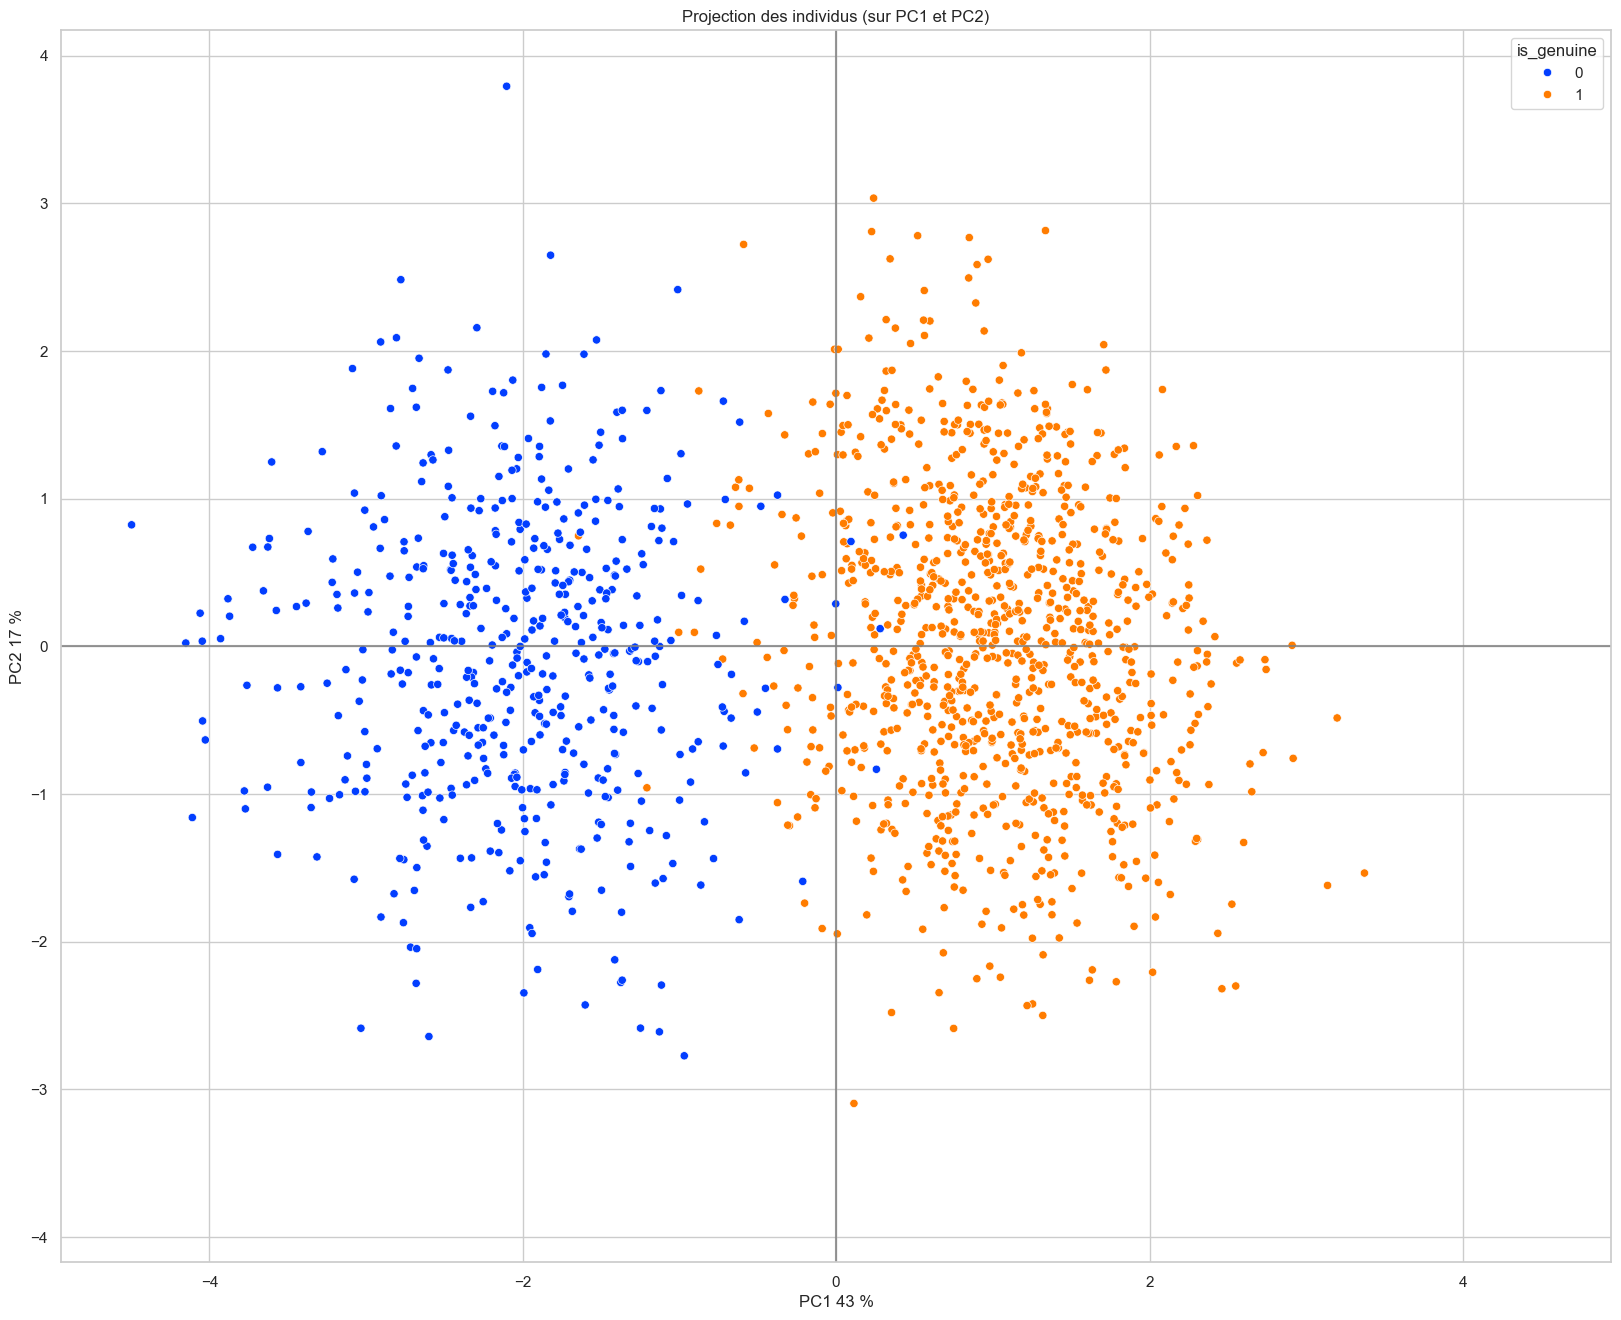

In [85]:
x_y = [0,1]
display_factorial_planes(df_acp, x_y, pca, figsize=(20,16), clusters=df_acp.is_genuine, marker="o")

On constate que l'on distingue bien nos 2 groupes (vrai billets et faux billets) sur nos 2 premières composantes !
___
- Les vrais billets ce concentrent sur le coté gauche
- Les faux billets ce concentrent sur le coté droit
- Nous voyons une zone "d'incertitude" qui est la zone de contact entre les 2 groupes
___
Les billets sont le plus différencier grâce à leur longueur (length), car c'est cette variable qui est le mieux représenter sur l'axe des abscisses !

<div style="background-color:orange; color:white; text-align:center; padding:10px; border-radius:5px;">
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Apprentissage des modèles </h2>
</div>

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">K-Means (Apprentissage non-supervisée) [Clustering]</h3>
</div>

On utilise 2 méthode pour trouver le nombre de cluster adapté :

- la méthode du coude
- le score silhouette


In [90]:
# On défini d'abord une liste vide pour sotcker nos inertie et score

inertia = [] 
sil_score = []

In [91]:
#On défini ensuite la liste du nombre de clusters que l'on veut tester
k_list = range(1, 10)
# Pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie

for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)

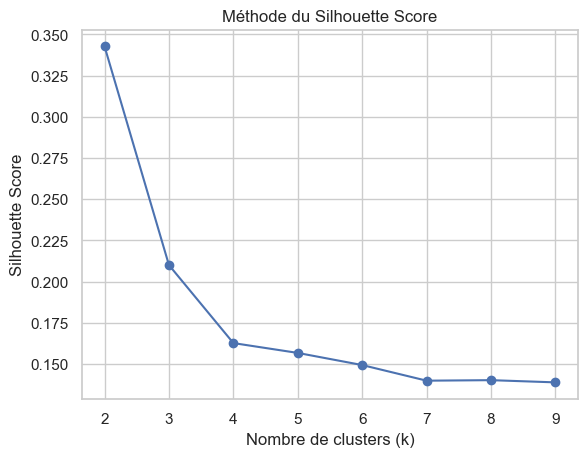

In [92]:
# Liste des nombres de clusters à tester
ks_list = range(2, 10)

# Initialisation de la liste des scores silhouette
sil_score = []

# Boucle sur chaque nombre de clusters
for k in ks_list:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_std)
    score = silhouette_score(data_std, kmeans.labels_)
    sil_score.append(score)

# Affichage des résultats
plt.plot(ks_list, sil_score, marker='o')
plt.title("Méthode du Silhouette Score")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

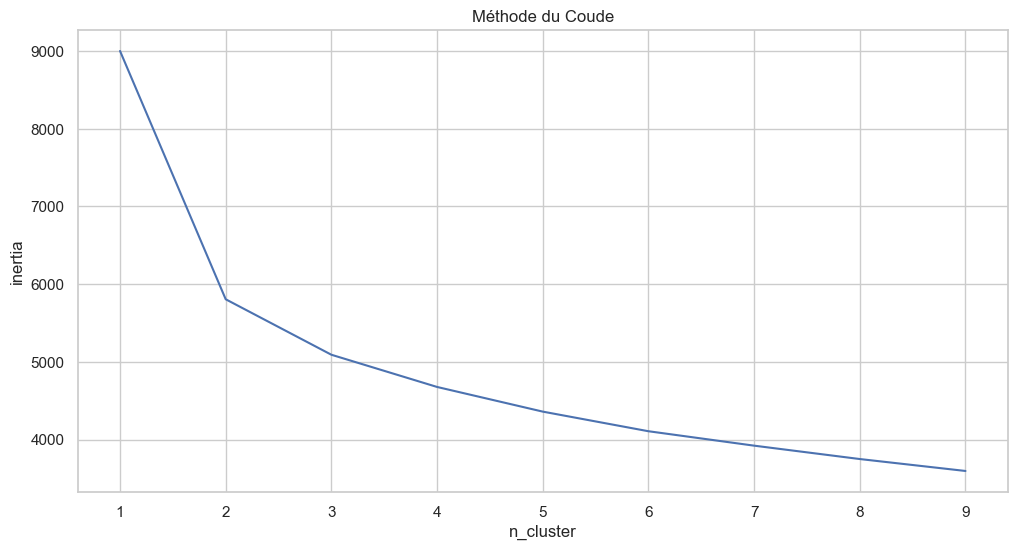

In [93]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title("Méthode du Coude")
ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, inertia)

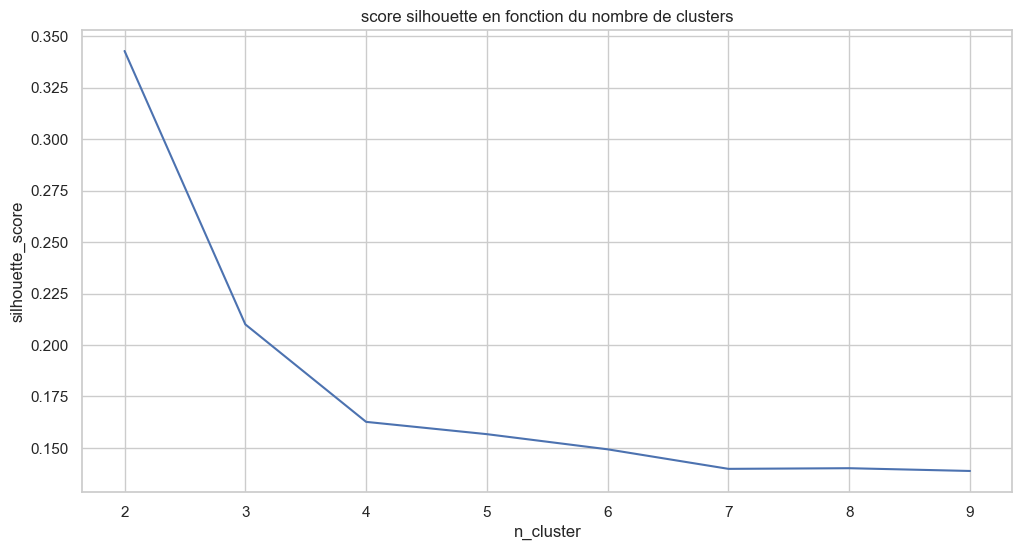

In [94]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title("score silhouette en fonction du nombre de clusters")
ax.set_ylabel("silhouette_score")
ax.set_xlabel("n_cluster")
ax = plt.plot(ks_list, sil_score)

**Méthode du coude**

On observe sur le graphique, que la plus grosse cassure ce trouve au niveau de 2 clusters !

**Score silhouette**

On observe sur le graphique, que on obtient le plus gros score à 2 clusters ! Avantage technique : le score silhouette est maximal ; la séparation des groupes est la meilleure, on privilégie la qualité du clustering.

___

On choisit donc d'utiliser le nombre de 2 cluster pour le K-Means !

In [96]:
# y est la variable à prédire !

y = data['is_genuine']
y

0     1
1     1
2     1
3     1
4     1
     ..
32    0
33    0
34    0
35    0
36    0
Name: is_genuine, Length: 1500, dtype: int64

In [97]:
# Séparation des données d'entrainement et des données test !

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data_std, y, test_size=0.33)

print('X_train :', len(X_train), 'lignes',
    '\ny_train :', len(y_train), 'lignes',
    '\nX_test :', len(X_test), 'lignes',
    '\ny_test :', len(y_test), 'lignes')

X_train : 1005 lignes 
y_train : 1005 lignes 
X_test : 495 lignes 
y_test : 495 lignes


In [98]:
# On définit le cnombre de cluster à 2 et on entraine !

kmeans = sk.cluster.KMeans(n_clusters=2, random_state=0).fit(X_train)

C:\Users\PC Gamer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [99]:
# Prédictions sur l'échantillon-test

y_kmean = kmeans.predict(X_test)
y_kmean[:5]

array([0, 0, 1, 0, 0])

In [100]:
y_test = y_test.replace([False, True], [1, 2]).reset_index()
#y_test = pd.DataFrame(y_test)
y_test

,index,is_genuine
0,561,1
1,26,1
2,1368,0
3,662,1
4,1362,0
...,...,...
490,1482,0
491,862,1
492,1098,0
493,678,1


In [101]:
ytest = y_test['is_genuine']
ytest

0      1
1      1
2      0
3      1
4      0
      ..
490    0
491    1
492    0
493    1
494    1
Name: is_genuine, Length: 495, dtype: int64

In [102]:
data_acp_kmeans = pca.fit_transform(X_test)
df_acp_kmeans = pd.DataFrame(data_acp_kmeans)
df_acp_kmeans.rename(columns = {0:'PC1',1:'PC2'}, inplace = True)
df_acp_kmeans

,PC1,PC2
0,-1.487632,0.691587
1,-1.317666,0.164624
2,2.352849,-0.668631
3,-1.665517,-0.576566
4,0.291175,-1.449019
...,...,...
490,0.370763,1.086312
491,-2.879155,0.200889
492,2.852040,-1.782189
493,-1.186365,0.246882


In [103]:
# Dataframe du K-Means

df_kmeans = df_acp_kmeans
df_kmeans['cluster'] = y_kmean
df_kmeans

,PC1,PC2,cluster
0,-1.487632,0.691587,0
1,-1.317666,0.164624,0
2,2.352849,-0.668631,1
3,-1.665517,-0.576566,0
4,0.291175,-1.449019,0
...,...,...,...
490,0.370763,1.086312,0
491,-2.879155,0.200889,0
492,2.852040,-1.782189,1
493,-1.186365,0.246882,0


In [104]:
# Création du Dataframe des centroides

df_centroide_kmeans = df_kmeans.groupby('cluster').mean()
df_centroide_kmeans = df_centroide_kmeans.reset_index()
df_centroide_kmeans['cluster'] = df_centroide_kmeans['cluster'].replace([0, 1], 'centroide')
df_centroide_kmeans

,cluster,PC1,PC2
0,centroide,-1.023787,0.045417
1,centroide,2.104451,-0.093357


In [105]:
# Concaténation des 2 DataFrame

df_kmeans = pd.concat([df_kmeans, df_centroide_kmeans], ignore_index = True)
df_kmeans

,PC1,PC2,cluster
0,-1.487632,0.691587,0
1,-1.317666,0.164624,0
2,2.352849,-0.668631,1
3,-1.665517,-0.576566,0
4,0.291175,-1.449019,0
...,...,...,...
492,2.852040,-1.782189,1
493,-1.186365,0.246882,0
494,-0.404313,-1.063923,0
495,-1.023787,0.045417,centroide


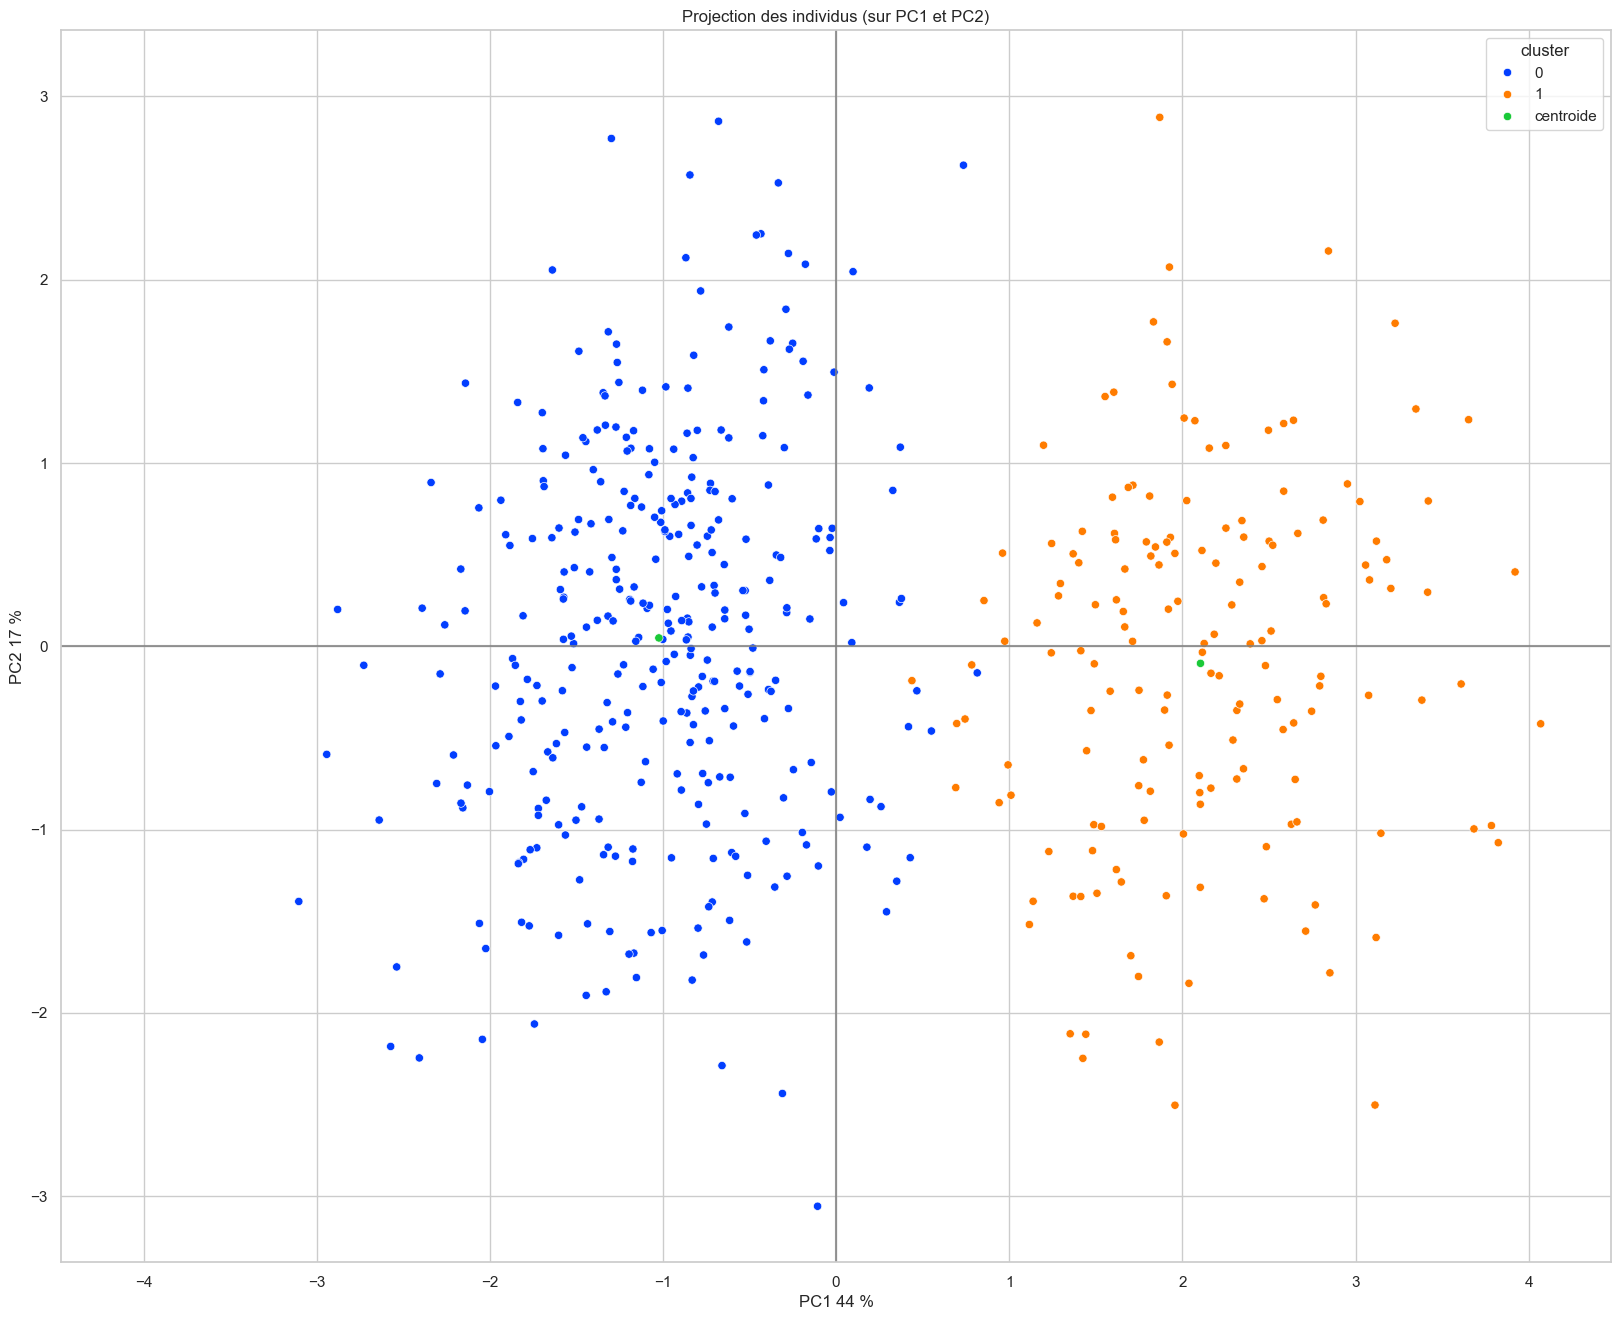

In [106]:
x_y = [0,1]
display_factorial_planes(df_kmeans, x_y, pca, figsize=(20,16), clusters=df_kmeans.cluster, marker="o")

On constate bien nos 2 groupes sur nos 2 premières composantes !
___
- Les centroides crée par le K-Means sont proche à ceux des données de base
- Les groupes sont très ressemblent à ceux des données de base
- La zone "d'insertitude" n'éxiste plus ! On voit une limite entre les 2 groupes !

In [108]:
# Suppression des centroides pour comparer les groupes de base aux groupes crée par le K-Means

df_kmeans.drop(df_kmeans.loc[df_kmeans['cluster'] == 'centroide'].index, inplace=True)

# Remplacement et conversion propre
df_kmeans['cluster'] = df_kmeans['cluster'].replace(0, 2)
df_kmeans['cluster'] = df_kmeans['cluster'].infer_objects(copy=False)

# Ajout de la colonne de vérité
df_kmeans['is_genuine'] = ytest

df_kmeans

C:\Users\PC Gamer\AppData\Local\Temp\ipykernel_1432\3063585693.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_kmeans['cluster'] = df_kmeans['cluster'].replace(0, 2)


,PC1,PC2,cluster,is_genuine
0,-1.487632,0.691587,2,1
1,-1.317666,0.164624,2,1
2,2.352849,-0.668631,1,0
3,-1.665517,-0.576566,2,1
4,0.291175,-1.449019,2,0
...,...,...,...,...
490,0.370763,1.086312,2,0
491,-2.879155,0.200889,2,1
492,2.852040,-1.782189,1,0
493,-1.186365,0.246882,2,1


In [109]:
# 1. Identifier les clusters réellement utilisés
clusters_utilises = df_kmeans['cluster'].value_counts()
clusters_valides = clusters_utilises[clusters_utilises > 0].index

# 2. Filtrer le DataFrame pour ne garder que les clusters avec au moins une occurrence
df_kmeans = df_kmeans[df_kmeans['cluster'].isin(clusters_valides)]

In [110]:
# Réindexer les clusters à 0 et 1
df_kmeans['cluster'] = df_kmeans['cluster'].replace({2: 0})

In [111]:
def matrice_confusion(a, b, nom_graphique):
    confusion_matrix = sk.metrics.confusion_matrix(a, b)

    group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
    group_percentages = [
        '{0:.2%}'.format(value) for value in confusion_matrix.flatten() / np.sum(confusion_matrix)]
    
    group_labels = [f'{count}\n{percent}' for count, percent in zip(group_counts, group_percentages)]

    shape = confusion_matrix.shape
    labels = np.asarray(group_labels).reshape(shape)

    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title(nom_graphique)
    plt.xlabel('Prédiction')
    plt.ylabel('Vérité terrain')
    plt.show()

    classification = sk.metrics.classification_report(a, b, zero_division=0)
    return classification

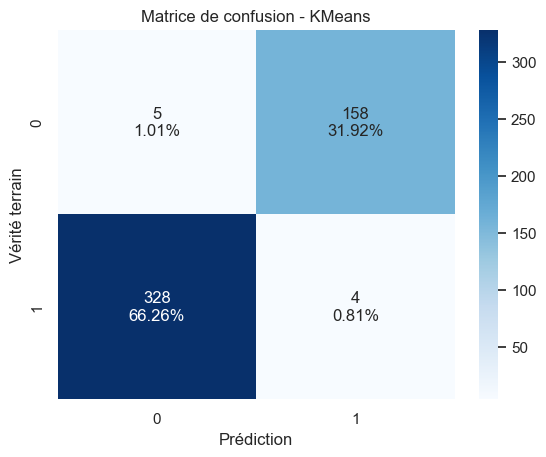

              precision    recall  f1-score   support

           0       0.02      0.03      0.02       163
           1       0.02      0.01      0.02       332

    accuracy                           0.02       495
   macro avg       0.02      0.02      0.02       495
weighted avg       0.02      0.02      0.02       495



In [112]:
rapport = matrice_confusion(df_kmeans['is_genuine'], df_kmeans['cluster'], 'Matrice de confusion - KMeans')
print(rapport)


La matrice de confusion nous permet d'évaluer les résultat du K-Means par rapport à nos données de base !
___
- 163 billets on été considérer comme vrais alors qu'ils étaient faux ! (32.93% des données)
- 320 billets ont été considérés comme faux alors qu'ils étaient vrais ! (64.65% des données)
- Le taux de données mal prédites est de 97,60 %, soit seulement 483 erreurs sur 495 échantillons.
---------------
- 4 billets ont été correctement identifiés comme vrais (0.81% des données)
- 8 billets ont été correctement identifiés comme faux (1.62% des données)
- 97,60% de prédictions incorrectes ! = somme des erreurs 32.93% + 64.65% = 97,60%

_Accuracy_ : Cet indicateur nous indique le pourcentage de prédictions correctes que notre modèle a réalisé sur l'ensemble de données de test. Plus la précision est élevée, meilleur est notre modèle.
___
**inAccuracy : 97,60% de predictions incorrectes ! et une Accuracy de 2.40%**

K-Means, étant un algorithme non supervisé, il ne peut pas rivaliser avec des méthodes supervisées comme la régression logistique pour une tâche de classification

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Regression logistique (Apprentissage supervisée) [Classification]</h3>
</div>

In [116]:
# y est la variable à prédire !

y = data['is_genuine']
y

0     1
1     1
2     1
3     1
4     1
     ..
32    0
33    0
34    0
35    0
36    0
Name: is_genuine, Length: 1500, dtype: int64

In [117]:
# Création du Train_set et du Test_set

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data_std, y, test_size=0.33)

print('X_train :', len(X_train), 'lignes',
    '\ny_train :', len(y_train), 'lignes',
    '\nX_test :', len(X_test), 'lignes',
    '\ny_test :', len(y_test), 'lignes')

X_train : 1005 lignes 
y_train : 1005 lignes 
X_test : 495 lignes 
y_test : 495 lignes


- 2/3 des données pour l'entrainement
- 1/3 des données pour le test

In [119]:
regression = sk.linear_model.LogisticRegression()
regression.fit(X_train, y_train)

LogisticRegression()

In [120]:
# Coef des variables

temp_coef = pd.DataFrame(regression.coef_[0], index=X_train.columns, columns=['coef'])
print(temp_coef)

                  coef
diagonal      0.210975
height_left  -0.459545
height_right -0.585731
margin_low   -2.558191
margin_up    -1.625458
length        3.437256


Ici le coefficient nous permet de savoir quelles variables sont le plus significatives pour la prédiction des résultats !
___
- Les 3 variables les plus significatives sont "length", "margin_low" et "margin_up"
- La variable la moin significative est "diagonal"

In [122]:
# Prédictions sur l'échantillon-test

y_log = regression.predict(X_test)
y_log[:5]

array([0, 1, 0, 1, 1], dtype=int64)

In [123]:
# DataFrame avec la probabilité que le billet soit vrai ou faux

proba_result = pd.DataFrame(regression.predict_proba(X_test)).rename(columns={0: 'False', 1: 'True'})
proba_result

,False,True
0,0.997547,0.002453
1,0.000515,0.999485
2,0.999929,0.000071
3,0.034699,0.965301
4,0.015749,0.984251
...,...,...
490,0.922662,0.077338
491,0.000219,0.999781
492,0.005456,0.994544
493,0.982436,0.017564


In [124]:
# Billets avec une probabilité infèrieur à 90% d'etre Vrais ou Faux

billets_confu = proba_result.loc[(proba_result['True'] > 0.10) & (proba_result['True'] < 0.90)]
billets_confu.head(10)

,False,True
30,0.152746,0.847254
33,0.385225,0.614775
86,0.886725,0.113275
129,0.818077,0.181923
164,0.875241,0.124759
183,0.785717,0.214283
198,0.733671,0.266329
241,0.182780,0.817220
248,0.213574,0.786426
280,0.193614,0.806386


La régression logistique nous permet d'avoir pour chaque billet, la probabilité que le billet soit vrais et la probabilité que le billet soit faux !

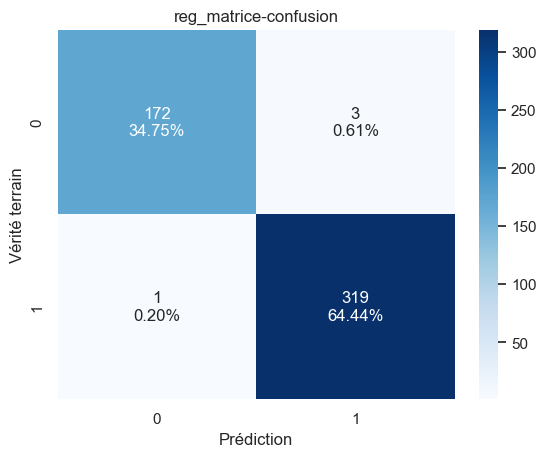

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.99       175\n           1       0.99      1.00      0.99       320\n\n    accuracy                           0.99       495\n   macro avg       0.99      0.99      0.99       495\nweighted avg       0.99      0.99      0.99       495\n'

In [126]:
matrice_confusion(y_test, y_log, 'reg_matrice-confusion')

La matrice de confusion nous permet d'évaluer les résultat de la régression logistique par rapport à nos données de base !
___
- 4 Billets ont été considérés comme faux alors qu'ils étaient vrais (0.81% des données, "faux négatifs").
- Le taux de données mal prédites est de 0.81 %, soit seulement 4 erreurs sur 495 échantillons.
----------
- 332 billets ont été correctement identifiés comme vrais (67.07% des données)
- 159 billets ont été correctement identifiés comme faux (32.12% des données)

_Accuracy_ : Cet indicateur nous indique le pourcentage de prédictions correctes que notre modèle a réalisé sur l'ensemble de données de test. Plus la précision est élevée, meilleur est notre modèle.
___
- **Accuracy : 99.12 % de prédictions correctes !**
- **Inaccuracy : 0.81 % de prédictions incorrectes!**

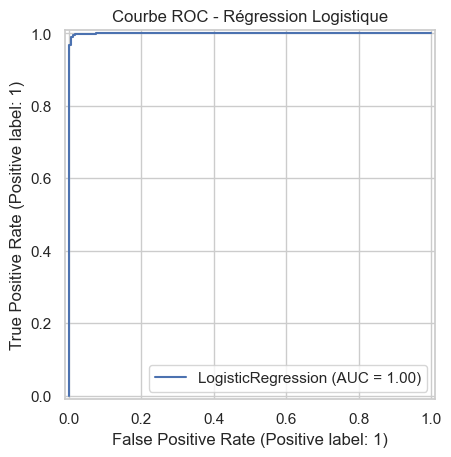

In [129]:
# Affichage de la courbe ROC pour ton modèle 'regression'
RocCurveDisplay.from_estimator(regression, X_test, y_test)
plt.title("Courbe ROC - Régression Logistique")
plt.grid(True)
plt.show()

La courbe ROC est une représentation graphique de la performance de notre modèle en fonction de différents seuils de classification. Elle trace la sensibilité en fonction de la spécificité pour chaque seuil de classification possible.
L'aire sous la courbe ROC mesure la qualité globale de notre modèle. Plus l'AUC est proche de 1, meilleur est notre modèle.
___
Comme avec les metrics calculées plus haut, on retombe sur un modèle quasiment parfait avec une aire sous la courbe approximée à 1.

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Selection des variables</h3>
</div>

In [132]:
# Recursive Feature Elimination

sel = RFECV(estimator = regression,cv=10, scoring = 'accuracy')
sel.fit(X_train, y_train)

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

In [133]:
cv_res = pd.DataFrame(sel.cv_results_)
cv_res

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,n_features
0,0.962188,0.021670,0.970297,0.960396,0.960396,0.920792,1.0,0.96,0.99,0.94,0.97,0.95,1
1,0.987079,0.013398,0.990099,0.980198,0.980198,0.970297,1.0,0.99,1.00,1.00,1.00,0.96,2
2,0.989040,0.013751,0.990099,0.990099,0.990099,0.990099,1.0,0.99,1.00,1.00,0.99,0.95,3
3,0.989059,0.012959,0.990099,0.990099,0.990099,0.970297,1.0,0.99,1.00,1.00,1.00,0.96,4
4,0.988059,0.012468,0.990099,0.980198,0.990099,0.980198,1.0,0.98,1.00,1.00,1.00,0.96,5
5,0.989059,0.010408,0.990099,0.980198,0.990099,0.980198,1.0,0.98,1.00,1.00,1.00,0.97,6


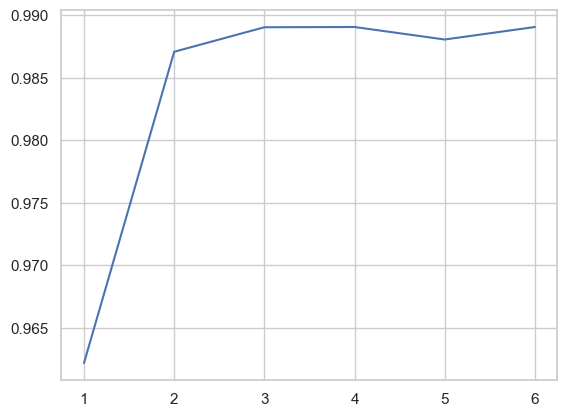

In [134]:
plt.plot(np.arange(1,7,1),cv_res['mean_test_score'])
plt.show()

In [135]:
print(sel.n_features_)

4


In [136]:
print(X_train.columns[sel.support_])

Index(['height_right', 'margin_low', 'margin_up', 'length'], dtype='object')


<div style="background-color:orange; color:white; text-align:center; padding:10px; border-radius:5px;">
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 8 - Choix du modele et Programme de détection</h2>
</div>

La régression logistique est la solution qui apporte les meilleurs résultats !

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Programme de détection des faux billets</h3>
</div>

In [140]:
# Visualisation des données du fichier

pd.read_csv('billets_production.csv')

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [141]:
# On enregistre les données d'entrainement dans un dictionnaire

data_train = {}
data_train[0] = std_scale
data_train[1] = pca
data_train[2] = regression
data_train

{0: StandardScaler(), 1: PCA(n_components=2), 2: LogisticRegression()}

In [142]:
import pickle

file = open('train', 'wb')
pickle.dump(data_train, file)
file.close()

In [143]:
# Import des librairies utiliser

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
import pickle
import csv

# Programe de detection de faux billets

# Programme de détection de faux billets
def detection_billets(fichier_csv):
    # Chargement du modèle complet
    model_path = Path(r'C:\Users\Public\algorithme\Detections_Billets.joblib')
    if not model_path.is_file():
        raise FileNotFoundError(f"Le fichier modèle '{model_path}' est introuvable.")
    
    std_scale, pca, regression = joblib.load(model_path)
    
    # Import des données à analyser
    data = pd.read_csv(fichier_csv)
    
    # Vérification des colonnes nécessaires
    features = {'diagonal', 'height_left', 'height_right',
    'margin_low', 'margin_up', 'length',
    'is_genuine', 'id', 'proba_genuine'}
    
    df_features = set(data.columns)
    if len(features - df_features) != 0:
        raise Exception(f'Variables manquantes : {list(features - df_features)}')
    if data.isna().any().any():
        raise Exception(f'Valeurs manquantes dans : {data.columns[data.isna().any()].to_list()}')
    
    # Préparation des données
    X = data.drop(columns='id')
    X_scaled = std_scale.transform(X)
    
    # Calcul des probabilités
    y_proba = regression.predict_proba(X_scaled)
    # Ajout de la colonne 'proba_genuine' = proba d'être un vrai billet (colonne 1)
    data['proba_genuine'] = y_proba[:, 1]

    # Application de la règle : vrai billet si proba ≥ 0.9
    data['is_genuine'] = data['proba_genuine'] >= 0.9
    
    # Application de la règle personnalisée
    pred = pd.DataFrame({
        'is_genuine': np.where(proba_vrais >= 0.9, 'Vrai billet', 'Faux billet')
    })
    
    # Préparation des résultats
    proba_df = pd.DataFrame({
        'Probabilité de faux': y_proba[:, 0],
        'Probabilité de vrai': proba_vrais
    })
    
    result = pd.concat([data[['id']], pred, proba_df], axis=1)
    
    # Affichage synthétique
    fake_list = list(result.loc[result['is_genuine'] == 'Faux billet', 'id'])
    if not fake_list:
        print("Aucun faux billet détecté.")
    else:
        print(f"IDs des faux billets détectés : {fake_list}")
    
    return result

In [144]:
# Sauvegarde de l'algorithme retenu

# Chemin complet du fichier à créer
chemin_modele = Path(r'C:\Users\Public\algorithme\Detections_Billets.joblib')

# Création du dossier s'il n'existe pas
chemin_modele.parent.mkdir(parents=True, exist_ok=True)

# Sauvegarde du modèle
# Sauvegarder le modèle
joblib.dump((std_scale, pca, regression), r'C:\Users\Public\algorithme\Detections_Billets.joblib')

['C:\\Users\\Public\\algorithme\\Detections_Billets.joblib']